# Bengaluru House Prices Prediction

# Q: Find out the R-Squared score for the Banguluru House Prices data using any Machine Learning Model and perform Exploratory Data Analysis on the data

# Given features of the data:
    area_type
    availability
    location
    size
    society
    total_sqft
    bath
    balcony
    price

# Tools Used:
    Pandas
    Numpy
    Matplotlib
    Seaborn
    Sklearn
    

In [1]:
#Importing the required tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
le = LabelEncoder()
norm = MinMaxScaler()
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Data Preparation

In [3]:
#no of rows and columns in the dataset
data.shape

(13320, 9)

we have total 13320 rows with 9 columns

In [4]:
#Column names
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# Finding Whetther the dataset contains the missing Values or not?

In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Almost 40% of society data and 5% of balony data is missing

Hence majority of the data is not provided we are deleting the null value rows.

In [6]:
#Deleting the society and balcony columns
data=data.dropna()

In [7]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00


In [8]:
data.shape

(7496, 9)

In [9]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

__Now the data is clean and free of null values.__

In [10]:
data.describe()

,bath,balcony,price
count,7496.000000,7496.000000,7496.000000
mean,2.458378,1.629936,96.857122
std,0.881128,0.780127,105.382490
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.500000
50%,2.000000,2.000000,69.755000
75%,3.000000,2.000000,105.000000
max,9.000000,3.000000,2700.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   object 
 1   availability  7496 non-null   object 
 2   location      7496 non-null   object 
 3   size          7496 non-null   object 
 4   society       7496 non-null   object 
 5   total_sqft    7496 non-null   object 
 6   bath          7496 non-null   float64
 7   balcony       7496 non-null   float64
 8   price         7496 non-null   float64
dtypes: float64(3), object(6)
memory usage: 585.6+ KB


# Exploratory Data Analysis

In [12]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0


# Q1 In Which location the highest price building is?

In [13]:
data.sort_values('price',ascending = False).head(1)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.0


The Highest Price is 2700 from the location is Shanthala Nagar.

# Area Type

# Q2 From Which areatype we have more houses?

In [14]:
At = pd.DataFrame(data["area_type"].value_counts())
At

,area_type
Super built-up Area,6017
Built-up Area,1158
Plot Area,269
Carpet Area,52


<AxesSubplot:>

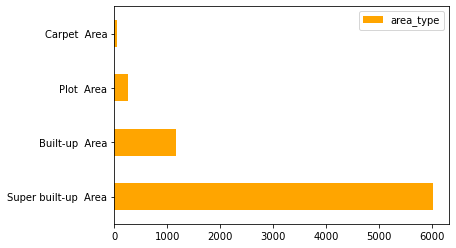

In [15]:
At.plot.barh(color = 'orange')

__Super built-up Area has the Highest of 6017 houses__

# Q3 Which is the Costliest areatype  with regarding house prices?

In [16]:
At1 = pd.DataFrame(data.groupby("area_type").mean()["price"])
At1

,price
area_type,
Built-up Area,90.443074
Carpet Area,74.613558
Plot Area,281.134275
Super built-up Area,90.045352


<AxesSubplot:xlabel='area_type'>

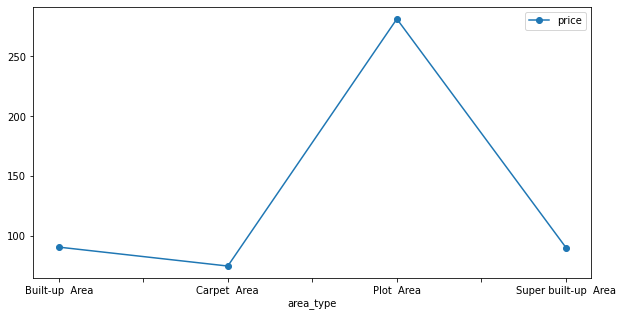

In [17]:
At1.plot(figsize=(10,5), marker='o')

__Plot Area type House will cost an average of 281 price__

# Q4 Find the Top 10 Locations Where the Building prices are High?

In [18]:
loc = pd.DataFrame(data.groupby("location").mean()["price"])
loc = loc.sort_values('price', ascending=False).iloc[:10]
loc

,price
location,
Yemlur,1245.000000
D Souza Layout,1015.000000
Shanthala Nagar,827.500000
Hunasamaranahalli,787.500000
Vasanth nagar,721.500000
Cunningham Road,684.142857
Langford Gardens,649.500000
St. John's Road,630.000000
Sathya Sai Layout,610.571429


<AxesSubplot:ylabel='location'>

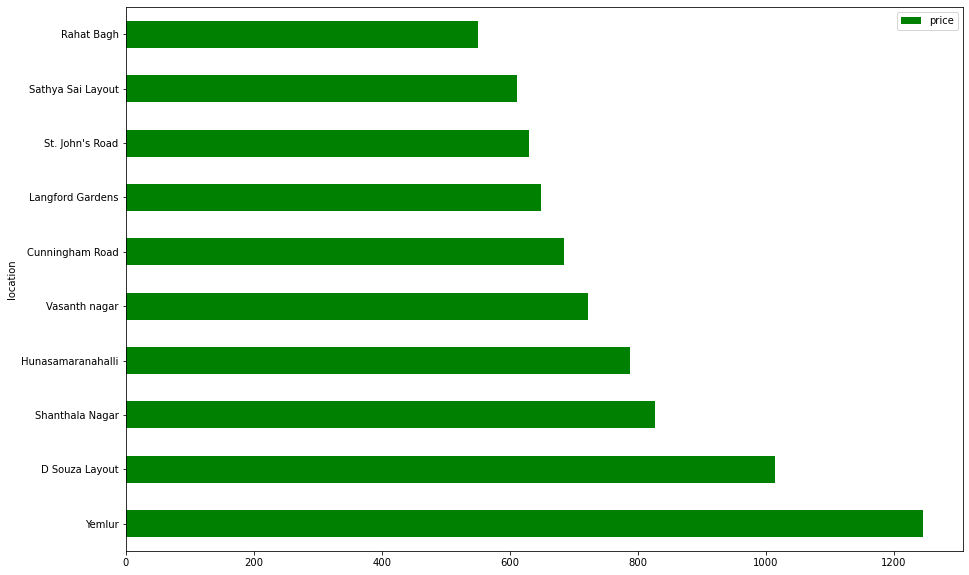

In [19]:
loc.plot.barh(figsize=(15,10),color='green')

In [20]:
loc.index

Index(['Yemlur', 'D Souza Layout', 'Shanthala Nagar', 'Hunasamaranahalli',
       'Vasanth nagar', 'Cunningham Road', 'Langford Gardens',
       'St. John's Road', 'Sathya Sai Layout', 'Rahat Bagh'],
      dtype='object', name='location')

These are the Top 10 Locations having High Building price

__'Yemlur',
'D Souza Layout',
'Shanthala Nagar',
'Hunasamaranahalli',
'Vasanth nagar', 
'Cunningham Road', 
'Langford Gardens',
 'St. John's Road', 
 'Sathya Sai Layout', 
 'Rahat Bagh'__

# Q5 What is the most demanded House size in Bangalore from the data?

In [21]:
data['size'].value_counts()

2 BHK        3411
3 BHK        3012
1 BHK         353
4 BHK         347
4 Bedroom     193
3 Bedroom     120
5 Bedroom      16
2 Bedroom      16
1 RK           10
5 BHK           9
6 BHK           3
6 Bedroom       3
11 BHK          1
9 BHK           1
7 BHK           1
Name: size, dtype: int64

__Here the data is taken as BHK and Bedroom but in reality both comes under same category__

So Considering the values BHK and bedrroom into single value.

In [22]:
data['size'].replace({"1 Bedroom":"1 BHK"},inplace = True)
data['size'].replace({"2 Bedroom":"2 BHK"},inplace = True)
data['size'].replace({"3 Bedroom":"3 BHK"},inplace = True)
data['size'].replace({"4 Bedroom":"4 BHK"},inplace = True)
data['size'].replace({"5 Bedroom":"5 BHK"},inplace = True)
data['size'].replace({"6 Bedroom":"6 BHK"},inplace = True)
data['size'].replace({"7 Bedroom":"7 BHK"},inplace = True)
data['size'].replace({"8 Bedroom":"8 BHK"},inplace = True)
data['size'].replace({"9 Bedroom":"9 BHK"},inplace = True)
data['size'].replace({"10 Bedroom":"10 BHK"},inplace = True)
data['size'].replace({"11 Bedroom":"11 BHK"},inplace = True)
data['size'].replace({"12 Bedroom":"12 BHK"},inplace = True)
data['size'].replace({"18 Bedroom":"18 BHK"},inplace = True)

data['size'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


2 BHK     3427
3 BHK     3132
4 BHK      540
1 BHK      353
5 BHK       25
1 RK        10
6 BHK        6
11 BHK       1
9 BHK        1
7 BHK        1
Name: size, dtype: int64

In [23]:
Size = pd.DataFrame(data.groupby("size").sum()["price"])
Size

,price
size,
1 BHK,11991.730
1 RK,282.690
11 BHK,360.000
2 BHK,203586.425
3 BHK,339199.185
4 BHK,156252.955
5 BHK,11786.000
6 BHK,2122.000
7 BHK,250.000


<AxesSubplot:xlabel='size'>

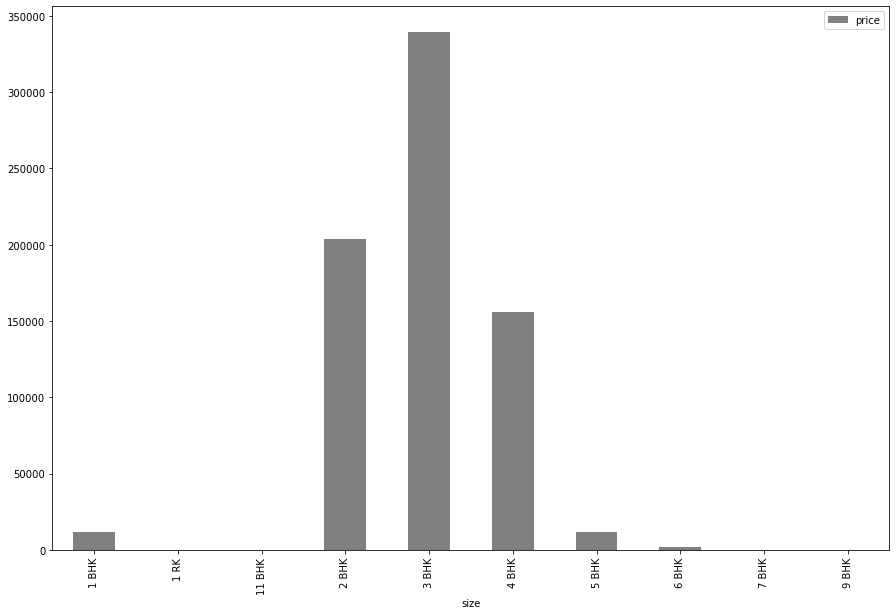

In [24]:
Size.plot.bar(figsize=(15,10), color="grey")

__3BHK size Houses are the most demanded houses in Bangalore.__

# Q6 In Which Location the Building price is low and is available for Ready to move?

In [25]:
d1 = data[data["availability"]=="Ready To Move"]
d1[d1["price"]==min(d1["price"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.0


__In Yelahanka New Town we have a Building price 8.0 and is Ready to Move.__

# Q7 Find the dates of Availability for the Houses in  Whitefield locality with size 1BHK?

In [26]:
Doa = data[(data["location"]=="Whitefield") & (data['size']=="1 BHK")]
Doa

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2094,Super built-up Area,18-Apr,Whitefield,1 BHK,Prtates,950,1.0,1.0,50.000
2166,Super built-up Area,Ready To Move,Whitefield,1 BHK,UKe 2nz,825,1.0,1.0,45.000
3364,Super built-up Area,19-Dec,Whitefield,1 BHK,Goted U,613 - 648,1.0,0.0,32.790
4226,Super built-up Area,19-Dec,Whitefield,1 BHK,Oreldhi,524 - 894,1.0,0.0,34.385
5044,Super built-up Area,Ready To Move,Whitefield,1 BHK,Pranthi,650,1.0,1.0,25.000
5174,Built-up Area,Ready To Move,Whitefield,1 BHK,SatraNa,810,1.0,0.0,21.000
5382,Super built-up Area,19-Dec,Whitefield,1 BHK,Oreldhi,524 - 894,1.0,0.0,34.735
5470,Super built-up Area,Ready To Move,Whitefield,1 BHK,UKe 2nz,825,1.0,1.0,44.900
5782,Super built-up Area,Ready To Move,Whitefield,1 BHK,UKe 2nz,530,1.0,1.0,29.440
5814,Super built-up Area,18-Apr,Whitefield,1 BHK,Prtates,905,1.0,1.0,50.000


In [27]:
Doa[["location","size","availability","price"]]

,location,size,availability,price
2094,Whitefield,1 BHK,18-Apr,50.000
2166,Whitefield,1 BHK,Ready To Move,45.000
3364,Whitefield,1 BHK,19-Dec,32.790
4226,Whitefield,1 BHK,19-Dec,34.385
5044,Whitefield,1 BHK,Ready To Move,25.000
5174,Whitefield,1 BHK,Ready To Move,21.000
5382,Whitefield,1 BHK,19-Dec,34.735
5470,Whitefield,1 BHK,Ready To Move,44.900
5782,Whitefield,1 BHK,Ready To Move,29.440
5814,Whitefield,1 BHK,18-Apr,50.000


# You can select the date and also check the prices of the buildings in Whitefield location of 1BHK size.

# Machine Learning

In [28]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 BHK,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [29]:
#Checking the null values
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [30]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

# Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
# Taking the non-numeic columns into a list
object_col = data.select_dtypes(object).columns
object_col

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [33]:
#Coverting the non-numeric data into numric data
for i in object_col:
    data[i]= le.fit_transform(data[i])

C:\Users\HP\AppData\Local\Temp/ipykernel_25140/2874110015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= le.fit_transform(data[i])


In [34]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,35,210,3,443,63,2.0,1.0,39.07
1,2,73,149,5,2353,1128,5.0,3.0,120.00
3,3,73,387,4,2109,551,3.0,1.0,95.00
5,3,73,625,3,585,192,2.0,1.0,38.00
11,2,73,625,5,1566,1163,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,3,73,590,4,100,378,2.0,1.0,57.00
13314,3,73,234,4,2148,725,3.0,3.0,112.00
13315,0,73,625,6,197,1262,4.0,0.0,231.00
13317,0,73,490,3,1168,159,2.0,1.0,60.00


In [35]:
#Initailize the data
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X)
print(y)

       area_type  availability  location  size  society  total_sqft  bath  \
0              3            35       210     3      443          63   2.0   
1              2            73       149     5     2353        1128   5.0   
3              3            73       387     4     2109         551   3.0   
5              3            73       625     3      585         192   2.0   
11             2            73       625     5     1566        1163   5.0   
...          ...           ...       ...   ...      ...         ...   ...   
13313          3            73       590     4      100         378   2.0   
13314          3            73       234     4     2148         725   3.0   
13315          0            73       625     6      197        1262   4.0   
13317          0            73       490     3     1168         159   2.0   
13318          3            27       459     5     2127        1367   4.0   

       balcony  
0          1.0  
1          3.0  
3          1.0  
5      

# Normalization

In [36]:
# Importing the Normalization 
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()

In [37]:
# Normalizing the independent data 
X_norm  = norm.fit_transform(X)
X = pd.DataFrame(X_norm,columns=X.columns)
X

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,1.000000,0.479452,0.331754,0.333333,0.170976,0.037478,0.125,0.333333
1,0.666667,1.000000,0.235387,0.555556,0.908144,0.671029,0.500,1.000000
2,1.000000,1.000000,0.611374,0.444444,0.813971,0.327781,0.250,0.333333
3,1.000000,1.000000,0.987362,0.333333,0.225782,0.114218,0.125,0.333333
4,0.666667,1.000000,0.987362,0.555556,0.604400,0.691850,0.500,1.000000
...,...,...,...,...,...,...,...,...
7491,1.000000,1.000000,0.932070,0.444444,0.038595,0.224866,0.125,0.333333
7492,1.000000,1.000000,0.369668,0.444444,0.829024,0.431291,0.250,1.000000
7493,0.000000,1.000000,0.987362,0.666667,0.076032,0.750744,0.375,0.000000
7494,0.000000,1.000000,0.774092,0.333333,0.450791,0.094587,0.125,0.333333


# Train_Test_Split

In [38]:
#Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(7496, 8)
(5247, 8)
(2249, 8)


70% of the data is splited into training data and 30% od the data is splitted into test data

# RandomForestRegressor

In [40]:
RF = RandomForestRegressor(n_estimators=21,random_state=42)

In [41]:
#Fitting the data into the model
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=21, random_state=42)

In [42]:
#Predicting the data
y_pred = RF.predict(X_test)
y_pred[:5]

array([ 77.01714286,  58.02238095, 151.33333333,  42.39095238,
        63.41333333])

In [43]:
#Orginal test data
np.array(y_test[:5])

array([ 70.  ,  55.47, 122.5 ,  36.  ,  62.35])

In [44]:
# Checking the R2 Score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,y_pred)

0.7447958417704195

In [45]:
print("Mean Absolute Error is =",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error is =",mean_squared_error(y_test,y_pred))
print("R2 Score is =",r2_score(y_test,y_pred))

Mean Absolute Error is = 20.495037790904796
Mean Squared Error is = 2537.0811612132015
R2 Score is = 0.7447958417704195


# So by taking the Bengaluru Building Prices dataset we got the values
Mean Absolute Error is = 20.495037790904796

Mean Squared Error is = 2537.0811612132015

R2 Score is = 0.7447958417704195